# Individual Assignment 4: 
## Computational Code and Output

In [81]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(AER)
library(patchwork)
library(car)
library(tidymodels)
library(glmnet)
library(leaps)
library(faraway)
library(mltools)
library(tibble)
library(leaps)

## Data Description

We will use the World University Rankings 2023 dataset from the Kaggle.
This dataset include the 1799 universities across 104 countries and regions with the descending order.
There dataset include 13 variables which are: 

1. **University Rank**  : Rank of specific university all over the world 
2. **Name of University**  : Specific name of University
3. **Location** : Place where university exists
4. **No. of student** : Present students enrolled in university
5. **No. of student per staff**  : Students under 1 Professor
6. **International Student** : Total number of International Students
7. **Female :Male Ratio** : Number of female and male ratio respectively
8. **OverAll Score** : Overall score out of 100
9. **Teaching Score** : Teaching score out of 100
10. **Research Score** : Research score out of 100
11. **Citations Score** : number of citations received by a journal in one year to documents published in the three previous years, divided by the number of documents indexed in Scopus published in those same three years. It is out of 100.
12. **Industry Income Score** : money a university receives from the working industry in exchange for its academic expertise
13. **International Outlook Score** : ability of a university to attract undergraduates, postgraduates and faculty

In this dataset, except the Name of University and Location are categorical categorical variables, the rest of 11 variables are all numeric variables.We will pick several variables as our respondes and explanatory variables from the 11 numeric variables.

The link of the our dataset is attaatched below
> https://www.kaggle.com/datasets/alitaqi000/world-university-rankings-2023


## Research Question


>**Predicting University Rankings for 2024 Based on World University Rankings 2023: What main factors influencing a university's overall Score Accurate Estimations?**

## Exploratory Data Analysis and Visualization

### Load the dataset

In [82]:
WorldRank <- read.csv("data/World University Rankings 2023.csv")
head(WorldRank)

University.Rank Name.of.University                    Location      
1 1               University of Oxford                  United Kingdom
2 2               Harvard University                    United States 
3 3               University of Cambridge               United Kingdom
4 3               Stanford University                   United States 
5 5               Massachusetts Institute of Technology United States 
6 6               California Institute of Technology    United States 
  No.of.student No.of.student.per.staff International.Student Female.Male.Ratio
1 20,965        10.6                    42%                   48 : 52          
2 21,887         9.6                    25%                   50 : 50          
3 20,185        11.3                    39%                   47 : 53          
4 16,164         7.1                    24%                   46 : 54          
5 11,415         8.2                    33%                   40 : 60          
6 2,237          6.2                    34%                   37 : 63          
  OverAll.Score Teaching.Score Research.Score Citations.Score
1 96.4          92.3           99.7           99.0           
2 95.2          94.8           99.0           99.3           
3 94.8          90.9           99.5           97.0           
4 94.8          94.2           96.7           99.8           
5 94.2          90.7           93.6           99.8           
6 94.1          90.9           97.0           97.3           
  Industry.Income.Score International.Outlook.Score
1 74.9                  96.2                       
2 49.5                  80.5                       
3 54.2                  95.8                       
4 65.0                  79.8                       
5 90.9                  89.3                       
6 89.8                  83.6

### Clean and Wrangle Data

In [83]:
## convert variables to from chr to numeric
WorldRank <- WorldRank |>
             mutate(University.Rank = as.numeric(University.Rank),
                    No.of.student = as.numeric(gsub(",", "", No.of.student)),
                    OverAll.Score = as.numeric(OverAll.Score),
                    Teaching.Score = as.numeric(Teaching.Score),
                    Research.Score = as.numeric(Research.Score),
                    Citations.Score = as.numeric(Citations.Score),
                    Industry.Income.Score = as.numeric(Industry.Income.Score),
                    International.Outlook.Score = as.numeric(International.Outlook.Score))      

## covert the International.Student and Female.Male.Ratio to numeric value
WorldRank  <- WorldRank |>
              mutate(International.Student = as.numeric(sub("%","", International.Student))/100)
             
worldRank <- WorldRank |>
             mutate(Female.Male.Ratio = sapply(strsplit(as.character(WorldRank$Female.Male.Ratio), ":"), 
                                      function(x) as.numeric(x[1]) / as.numeric(x[2])))

worldRank$Location <- as.factor(worldRank$Location)

head(worldRank)

Warning message:
“There were 7 warnings in `mutate()`.
The first warning was:
ℹ In argument: `University.Rank = as.numeric(University.Rank)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 6 remaining warnings.”


University.Rank Name.of.University                    Location      
1 1               University of Oxford                  United Kingdom
2 2               Harvard University                    United States 
3 3               University of Cambridge               United Kingdom
4 3               Stanford University                   United States 
5 5               Massachusetts Institute of Technology United States 
6 6               California Institute of Technology    United States 
  No.of.student No.of.student.per.staff International.Student Female.Male.Ratio
1 20965         10.6                    0.42                  0.9230769        
2 21887          9.6                    0.25                  1.0000000        
3 20185         11.3                    0.39                  0.8867925        
4 16164          7.1                    0.24                  0.8518519        
5 11415          8.2                    0.33                  0.6666667        
6  2237          6.2                    0.34                  0.5873016        
  OverAll.Score Teaching.Score Research.Score Citations.Score
1 96.4          92.3           99.7           99.0           
2 95.2          94.8           99.0           99.3           
3 94.8          90.9           99.5           97.0           
4 94.8          94.2           96.7           99.8           
5 94.2          90.7           93.6           99.8           
6 94.1          90.9           97.0           97.3           
  Industry.Income.Score International.Outlook.Score
1 74.9                  96.2                       
2 49.5                  80.5                       
3 54.2                  95.8                       
4 65.0                  79.8                       
5 90.9                  89.3                       
6 89.8                  83.6

>- **Now we convert the all the variable to the numeric value except the "Name of University" and the "Location"** 

>- **Next will will remove the NA from our dataset to finally make it to the tidy format**

In [86]:
worldRank <- na.omit(worldRank)
head(worldRank)
tail(worldRank)


University.Rank Name.of.University                    Location      
1 1               University of Oxford                  United Kingdom
2 2               Harvard University                    United States 
3 3               University of Cambridge               United Kingdom
4 3               Stanford University                   United States 
5 5               Massachusetts Institute of Technology United States 
6 6               California Institute of Technology    United States 
  No.of.student No.of.student.per.staff International.Student Female.Male.Ratio
1 20965         10.6                    0.42                  0.9230769        
2 21887          9.6                    0.25                  1.0000000        
3 20185         11.3                    0.39                  0.8867925        
4 16164          7.1                    0.24                  0.8518519        
5 11415          8.2                    0.33                  0.6666667        
6  2237          6.2                    0.34                  0.5873016        
  OverAll.Score Teaching.Score Research.Score Citations.Score
1 96.4          92.3           99.7           99.0           
2 95.2          94.8           99.0           99.3           
3 94.8          90.9           99.5           97.0           
4 94.8          94.2           96.7           99.8           
5 94.2          90.7           93.6           99.8           
6 94.1          90.9           97.0           97.3           
  Industry.Income.Score International.Outlook.Score
1 74.9                  96.2                       
2 49.5                  80.5                       
3 54.2                  95.8                       
4 65.0                  79.8                       
5 90.9                  89.3                       
6 89.8                  83.6

University.Rank Name.of.University               Location      
193 194             Medical University of Vienna     Austria       
194 194             University of Miami              United States 
195 196             University of Erlangen-Nuremberg Germany       
197 198             Durham University                United Kingdom
198 198             Queen’s University Belfast                     
199 198             University of Reading            United Kingdom
    No.of.student No.of.student.per.staff International.Student
193  7274          8.4                    0.33                 
194 17009         10.8                    0.16                 
195 30303         43.4                    0.13                 
197 18425         14.1                    0.35                 
198 19060         15.8                    0.39                 
199 15720         16.4                    0.32                 
    Female.Male.Ratio OverAll.Score Teaching.Score Research.Score
193 1.000000          54.6          35.0           27.6          
194 1.127660          54.6          48.4           33.5          
195 1.040816          54.5          44.6           47.5          
197 1.173913          54.4          40.0           44.6          
198 1.325581          54.4          31.1           37.9          
199 1.272727          54.4          36.5           39.6          
    Citations.Score Industry.Income.Score International.Outlook.Score
193 94.0            61.2                  81.7                       
194 81.0            48.3                  60.2                       
195 68.8            90.7                  53.5                       
197 70.0            39.4                  94.3                       
198 84.4            41.6                  97.4                       
199 78.5            42.2                  93.3

### Visualize

### Visualize the distribution of the overall score based on the Location

>**Location is the only categorical variable we have in the tidy dataset, and we want to check the relationship between our our response variable (OverAll.Score) and the Location.**

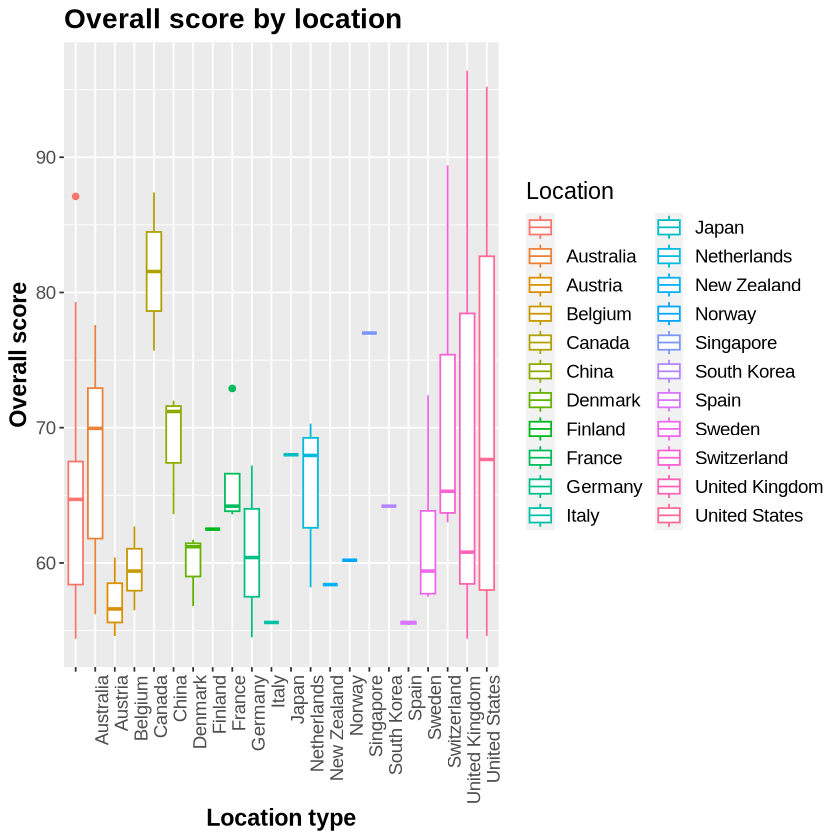

In [51]:
worldRank_plot <- ggplot(worldRank, aes(x = Location, y = OverAll.Score, color = Location)) +
  geom_boxplot() +
  theme(
    text = element_text(size = 14),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    axis.text.x = element_text(angle = 90, hjust = 1)  
  ) +
  
  ggtitle("Overall score by location") +
  xlab("Location type") +
  ylab("Overall score")

worldRank_plot 

**Interprete the Boxplot** 
1) **The University of Canada Singapore  has the highest median overall score** 
2) **The University of Italy and University of Spain has the lowest median overall score**
3) **The University of UK and  US has the largest whiskers which represent the range of the data**

**By check the distribution of the overall score under different location,it shows there is no obvious trend and it is not my interest**

**Beside, the University.Rank is higher correlated with the our response variable,so we will remove it from our dataset**

In [52]:
worldRank <- worldRank |> 
              select(-Location,-University.Rank)
head(worldRank)



Name.of.University                    No.of.student No.of.student.per.staff
1 University of Oxford                  20965         10.6                   
2 Harvard University                    21887          9.6                   
3 University of Cambridge               20185         11.3                   
4 Stanford University                   16164          7.1                   
5 Massachusetts Institute of Technology 11415          8.2                   
6 California Institute of Technology     2237          6.2                   
  International.Student Female.Male.Ratio OverAll.Score Teaching.Score
1 0.42                  0.9230769         96.4          92.3          
2 0.25                  1.0000000         95.2          94.8          
3 0.39                  0.8867925         94.8          90.9          
4 0.24                  0.8518519         94.8          94.2          
5 0.33                  0.6666667         94.2          90.7          
6 0.34                  0.5873016         94.1          90.9          
  Research.Score Citations.Score Industry.Income.Score
1 99.7           99.0            74.9                 
2 99.0           99.3            49.5                 
3 99.5           97.0            54.2                 
4 96.7           99.8            65.0                 
5 93.6           99.8            90.9                 
6 97.0           97.3            89.8                 
  International.Outlook.Score
1 96.2                       
2 80.5                       
3 95.8                       
4 79.8                       
5 89.3                       
6 83.6

### Visualize the relationship between the OverAll.Score and Rest Variables

**correlation pairplot**

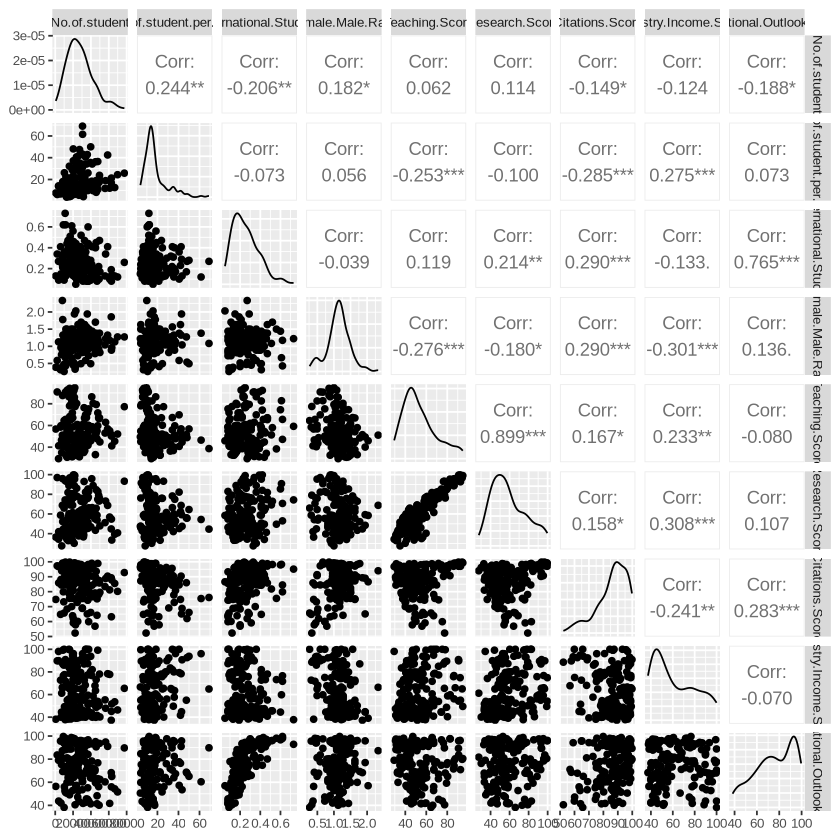

In [53]:
worldRank_pairplot <- worldRank |>
                      select(-OverAll.Score, -Name.of.University) |>
                      ggpairs(progress = FALSE) +
                      theme(
                           text = element_text(size = 10),
                           plot.title = element_text(face = "bold"),
                           axis.title = element_text(face = "bold")
  )
worldRank_pairplot

**From this pairplot, we would see there are multicollinearity issue which means some predictive variables are highly correlated with each other, and we will check the Variance Inflation Factor (VIF) to select our variables** 

**Variance Inflation Factor (VIF)**

In [54]:
worldRank1 <- worldRank |>
             select(-Name.of.University)
MLR_worldRank1 <- lm(OverAll.Score ~. , worldRank1)
MLR_worldRank1_results <- tidy(worldRank1) %>% mutate_if(is.numeric, round, 2)
MLR_worldRank1_results

Warning message:
“Data frame tidiers are deprecated and will be removed in an upcoming release of broom.”


column                      n   mean     sd       median   trimmed  mad    
1  No.of.student               173 27507.95 14456.11 25680.00 26361.91 9248.00
2  No.of.student.per.staff     173    17.77    10.96    14.60    16.02    3.90
3  International.Student       173     0.26     0.13     0.23     0.24    0.08
4  Female.Male.Ratio           173     1.13     0.34     1.13     1.14    0.17
5  OverAll.Score               173    66.84    11.06    63.40    65.30    6.00
6  Teaching.Score              173    53.52    15.72    49.40    51.96    9.30
7  Research.Score              173    59.01    17.72    55.60    57.63   11.50
8  Citations.Score             173    86.19    10.52    88.10    87.52    7.10
9  Industry.Income.Score       173    61.75    19.25    55.30    60.19   13.40
10 International.Outlook.Score 173    75.71    17.26    77.00    77.06   14.90
   min    max      range    skew  kurtosis se     
1  629.00 77468.00 76839.00  0.80 3.63     1099.08
2    3.80    69.00    65.20  1.82 6.87        0.83
3    0.05     0.73     0.68  0.93 3.76        0.01
4    0.27     2.33     2.07 -0.03 3.95        0.03
5   54.40    96.40    42.00  1.07 3.17        0.84
6   29.40    94.80    65.40  0.84 3.01        1.20
7   27.60    99.70    72.10  0.60 2.45        1.35
8   52.30    99.80    47.50 -1.02 3.54        0.80
9   37.30   100.00    62.70  0.54 1.95        1.46
10  38.20    99.60    61.40 -0.45 2.07        1.31

In [55]:
VIF_MLR_CASchools <- vif(MLR_worldRank1)

VIF_table <- data.frame(
  Variables = names(VIF_MLR_CASchools),
  VIF = VIF_MLR_CASchools
)
VIF_table

Variables                   VIF     
No.of.student               No.of.student               1.379222
No.of.student.per.staff     No.of.student.per.staff     1.490619
International.Student       International.Student       2.912519
Female.Male.Ratio           Female.Male.Ratio           1.472438
Teaching.Score              Teaching.Score              8.135942
Research.Score              Research.Score              7.826823
Citations.Score             Citations.Score             1.471759
Industry.Income.Score       Industry.Income.Score       1.610298
International.Outlook.Score International.Outlook.Score 3.190302

**The smallest the VIF, the lower the sign of multicollinearity.We can see some VIF are pretty high so I will drop the score above the 2 to get the roughfully selection.**

### Relationship between OverAll.Score and these roughly selected explanatory variables

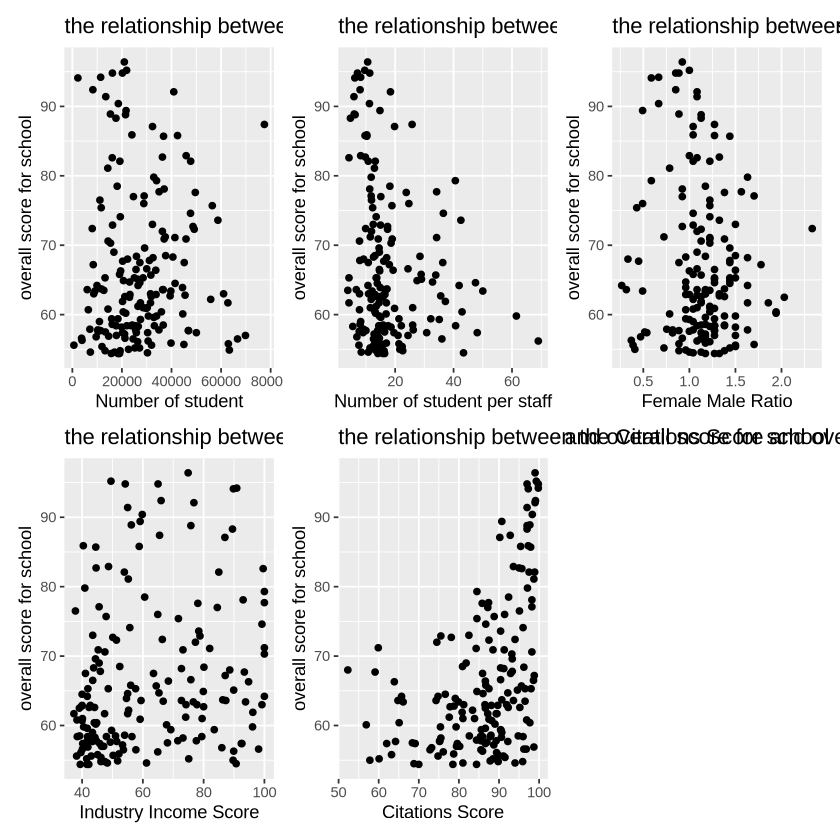

In [56]:
plot1 <- ggplot(aes(x = No.of.student, y = OverAll.Score), data = worldRank1) +
        geom_point() +
        xlab("Number of student") +
        ylab("overall score for school") +
        ggtitle("the relationship between the Number of student and overall score for school")


plot2 <- ggplot(aes(x = No.of.student.per.staff, y = OverAll.Score), data = worldRank1) +
        geom_point() +
        xlab("Number of student per staff") +
        ylab("overall score for school") +
        ggtitle("the relationship between the Number of student per staff and overall score for school")


plot3 <- ggplot(aes(x = Female.Male.Ratio, y = OverAll.Score), data = worldRank1) +
        geom_point() +
        xlab("Female Male Ratio") +
        ylab("overall score for school") +
        ggtitle("the relationship between the Female Male Ratio and overall score for school")


plot4 <- ggplot(aes(x = Industry.Income.Score, y = OverAll.Score), data = worldRank1) +
        geom_point() +
        xlab("Industry Income Score") +
        ylab("overall score for school") +
        ggtitle("the relationship between the Industry Income Score and overall score for school")


plot5 <- ggplot(aes(x = Citations.Score, y = OverAll.Score), data = worldRank1) +
        geom_point() +
        xlab("Citations Score") +
        ylab("overall score for school") +
        ggtitle("the relationship between the Citations Score and overall score for school")


combined_plot <- plot1 + plot2 + plot3 + plot4 + plot5
combined_plot

**From the Rough plot spay, we can the overall score and citation score has the strong positive relationship, and rest of plots are not easy to see.**

### OutLine for the rest analysis

1) **After visualization the relationship between our response variables and  five predictor variables, we find some variables are not the strictly linear relationship.** 

2) **So in the Next remaining research, In stead of using the normal OLS, we will use the Lasso regression to select the variable to avoid the multicollinearity issue.**

3) **After Selected the variable, we will do the initial split for our selected dataset and build the tidymodel to predict our our response variable.**

4) **Finally, we will check the RMSE to assess the goodness of our fit and prediction.**

## Implementation of a proposed model

### Lasso Selection 

In [57]:
# initial split
set.seed(1234)

# Split the data
worldRank_split <- initial_split(worldRank, prop = 0.75, strata = OverAll.Score)
training_worldRank <- training(worldRank_split)
testing_worldRank <- testing(worldRank_split)

# Remove university names and University Rank
training_worldRank <- training_worldRank[, !colnames(training_worldRank) %in% c("Name.of.University")]
testing_worldRank <- testing_worldRank[, !colnames(testing_worldRank) %in% c("Name.of.University")]

training_worldRank


No.of.student No.of.student.per.staff International.Student
1    7068          9.2                    0.28                 
2   34928         16.0                    0.08                 
3   10271         26.2                    0.13                 
4   25548         15.3                    0.17                 
5   46807         16.1                    0.08                 
6   11399         10.0                    0.16                 
7   10364          7.7                    0.36                 
8   50027         19.6                    0.17                 
9   20243         48.1                    0.27                 
10  25810          9.0                    0.13                 
11  21069         12.8                    0.15                 
12  69831         24.4                    0.12                 
13   3722         14.1                    0.27                 
14  21211         14.6                    0.36                 
15  66637         12.6                    0.13                 
16  24523         36.0                    0.20                 
17   3896         13.6                    0.09                 
18  30561         69.0                    0.27                 
19  26350         14.2                    0.36                 
20  39797         17.0                    0.09                 
21  62931         21.3                    0.08                 
22  45004         15.8                    0.11                 
23  31933         12.7                    0.16                 
24    629          7.6                    0.13                 
25  27105         14.3                    0.28                 
26  25215         11.4                    0.11                 
27  22673         21.6                    0.20                 
28  63338         13.2                    0.14                 
29  13205         16.2                    0.44                 
30  19266         22.6                    0.14                 
⋮   ⋮             ⋮                       ⋮                    
100  2237          6.2                    0.34                 
101  8279          8.0                    0.23                 
102 40921         18.4                    0.24                 
103 13482          5.9                    0.21                 
104 18545         11.2                    0.61                 
105 21665         14.8                    0.41                 
106 15366          6.0                    0.36                 
107 17584          4.7                    0.29                 
108 77468         25.8                    0.26                 
109 32337         19.8                    0.25                 
110 36790         10.3                    0.60                 
111 45912          8.2                    0.17                 
112 36337          9.8                    0.42                 
113 16091          4.2                    0.24                 
114 19175         13.2                    0.20                 
115 47727         10.8                    0.18                 
116 14305         12.9                    0.47                 
117 18087         18.2                    0.43                 
118 37030         11.3                    0.28                 
119 35003         34.2                    0.19                 
120 28965         11.8                    0.52                 
121 28826         24.7                    0.40                 
122 56452         18.9                    0.34                 
123 11641         12.3                    0.62                 
124 47663         36.5                    0.18                 
125 19347         13.5                    0.21                 
126 58725         42.5                    0.41                 
127 32309         12.5                    0.30                 
128 16218         15.0                    0.22                 
129 48674         17.4                    0.22                 
    Female.Male.Ratio OverAll.Score 

In [58]:
# Separate predictors and response variables
worldRank_X_train <- as.matrix(training_worldRank[, -5])
worldRank_Y_train <- as.matrix(training_worldRank[, 5]) 
worldRank_X_test <- as.matrix(testing_worldRank[, -5])
worldRank_Y_test <- as.matrix(testing_worldRank[, 5])


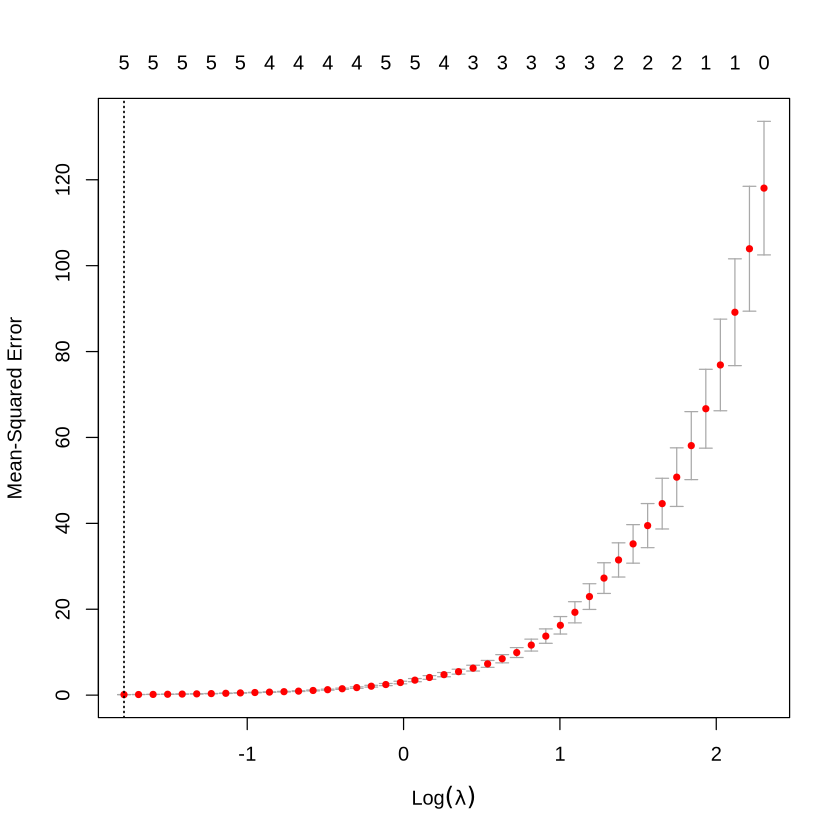

In [59]:
# Lasso Plot to check the range of the lamda
worldRank_Lasso <- cv.glmnet(x = worldRank_X_train, 
                          y = worldRank_Y_train,
                          alpha = 1,
                          
                         )
plot(worldRank_Lasso)

**From the Lasso plot, we see the negative values on the x-axis, indicating that the original lambda values are less than 1 and these negative values simply represent small lambda values close to zero.**

In [60]:
# select limda that providea the lowest cross_validation MSE
best_lambda <- worldRank_Lasso$lambda.min
best_lambda
beta_lasso <- coef(worldRank_Lasso, s = best_lambda)
beta_lasso
as.matrix(beta_lasso)

[1] 0.1672685

10 x 1 sparse Matrix of class "dgCMatrix"
                                    s1
(Intercept)                 2.98708673
No.of.student               .         
No.of.student.per.staff     .         
International.Student       .         
Female.Male.Ratio           .         
Teaching.Score              0.28018898
Research.Score              0.31125547
Citations.Score             0.28723770
Industry.Income.Score       0.01430562
International.Outlook.Score 0.06379456

s1        
(Intercept)                 2.98708673
No.of.student               0.00000000
No.of.student.per.staff     0.00000000
International.Student       0.00000000
Female.Male.Ratio           0.00000000
Teaching.Score              0.28018898
Research.Score              0.31125547
Citations.Score             0.28723770
Industry.Income.Score       0.01430562
International.Outlook.Score 0.06379456

In [61]:
lasso_selected_covariates <- as_tibble(
         as.matrix(coef(worldRank_Lasso, s = best_lambda)),rownames='covariate') %>%                     
         filter(covariate != '(Intercept)' & abs(s1) !=0) %>% 
         pull(covariate)

as.matrix(lasso_selected_covariates)

[,1]                       
[1,] Teaching.Score             
[2,] Research.Score             
[3,] Citations.Score            
[4,] Industry.Income.Score      
[5,] International.Outlook.Score

In [62]:
##check the VIF
lasso_variables_vif <- car::vif(lm(OverAll.Score ~ . , 
                                   data = training_worldRank %>% 
                                   select(contains(lasso_selected_covariates), OverAll.Score)))
as.matrix(lasso_variables_vif)

[,1]    
Teaching.Score              6.128490
Research.Score              6.377646
Citations.Score             1.193413
Industry.Income.Score       1.214805
International.Outlook.Score 1.359304

**By using the Lasso Selection, it still show high vif, we will use forward selection instead in the following variable selection**

### Forward Selection

In [64]:
worldRank_forward_sel <- regsubsets(
    x = OverAll.Score ~ . , nvmax = 9,
    data = training_worldRank,
    method = "forward" , )
worldRank_forward_summary <- summary(worldRank_forward_sel)
worldRank_forward_summary

Subset selection object
Call: regsubsets.formula(x = OverAll.Score ~ ., nvmax = 9, data = training_worldRank, 
    method = "forward", )
9 Variables  (and intercept)
                            Forced in Forced out
No.of.student                   FALSE      FALSE
No.of.student.per.staff         FALSE      FALSE
International.Student           FALSE      FALSE
Female.Male.Ratio               FALSE      FALSE
Teaching.Score                  FALSE      FALSE
Research.Score                  FALSE      FALSE
Citations.Score                 FALSE      FALSE
Industry.Income.Score           FALSE      FALSE
International.Outlook.Score     FALSE      FALSE
1 subsets of each size up to 9
Selection Algorithm: forward
         No.of.student No.of.student.per.staff International.Student
1  ( 1 ) " "           " "                     " "                  
2  ( 1 ) " "           " "                     " "                  
3  ( 1 ) " "           " "                     " "                  
4  ( 1 )

n_input_variables RSQ       RSS          ADJ.R2    Cp           BIC       
1 1                 0.8620816 2075.1402635 0.8609956 1.854882e+06  -245.8413
2 2                 0.9684931  474.0572646 0.9679930 4.236458e+05  -431.4443
3 3                 0.9885362  172.4852845 0.9882611 1.540669e+05  -557.0056
4 4                 0.9984017   24.0484383 0.9983501 2.137836e+04  -806.3070
5 5                 0.9999909    0.1366149 0.9999906 5.122628e+00 -1468.4623
6 6                 0.9999910    0.1349636 0.9999906 5.646543e+00 -1465.1712
7 7                 0.9999911    0.1335871 0.9999906 6.416050e+00 -1461.6338
8 8                 0.9999911    0.1332805 0.9999906 8.141931e+00 -1457.0705
9 9                 0.9999912    0.1331217 0.9999905 1.000000e+01 -1452.3644

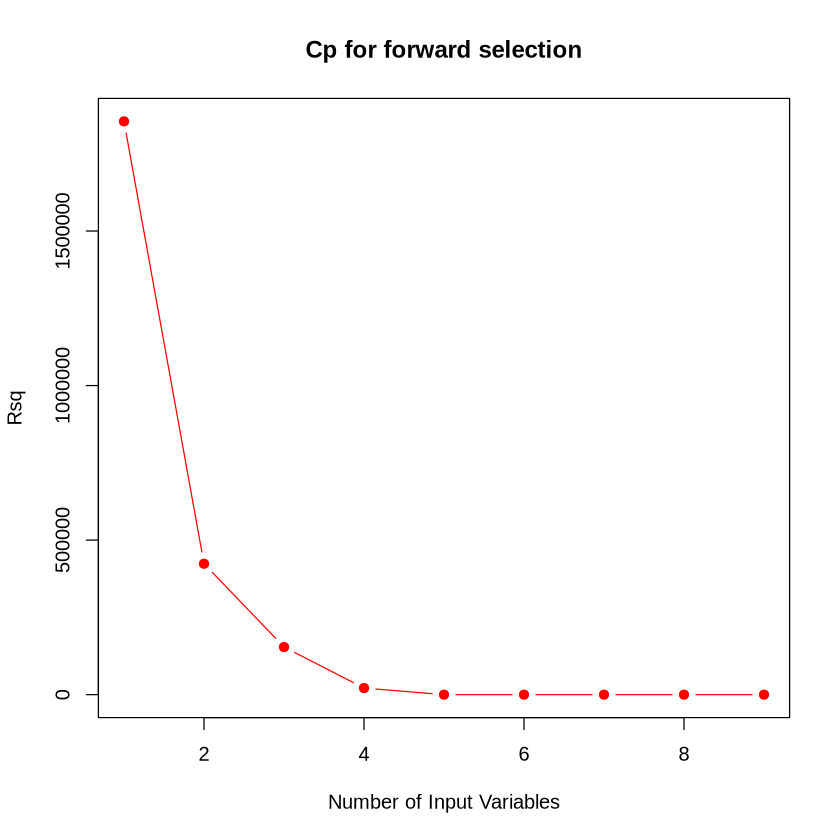

In [65]:
## check R-square 
worldRank_forward_summary_df <- tibble(
    n_input_variables = 1:9,
    RSQ = worldRank_forward_summary$rsq,
    RSS = worldRank_forward_summary$rss,
    ADJ.R2 = worldRank_forward_summary$adjr2,
    Cp = worldRank_forward_summary$cp,
    BIC = worldRank_forward_summary$bic,
)
worldRank_forward_summary_df

plot(summary(worldRank_forward_sel)$cp,
     main = "Cp for forward selection",
     xlab = "Number of Input Variables", ylab = "Rsq", type = "b", pch = 19,
     col = "red"
)

**Base on the forward selection plot, we will select 5 variables as our predictor variable.**


In [66]:
## selected variable 
cp_min = which.min(worldRank_forward_summary$cp)
selected_var <- names(coef(worldRank_forward_sel,cp_min))[-1]
as.matrix(selected_var)

[,1]                       
[1,] Teaching.Score             
[2,] Research.Score             
[3,] Citations.Score            
[4,] Industry.Income.Score      
[5,] International.Outlook.Score

### Build the Model for Prediction

In [69]:
## define the new training and test set 
training_subset <- training_worldRank %>% select(selected_var,OverAll.Score)
testing_subset <- testing_worldRank %>% select(selected_var,OverAll.Score)

## using the tidymodels
lm_spec <- linear_reg() %>% 
  set_engine("lm") %>% 
  set_mode("regression")

lm_recipe <- recipe(OverAll.Score ~ ., data = training_subset)

worldRank_full_tidy <- workflow() %>% 
  add_recipe(lm_recipe) %>% 
  add_model(lm_spec) %>% 
  fit(data = training_subset)

## Predict model and check the RMSE 
lm_test_resualts_selected <- worldRank_full_tidy |>
                    predict(testing_subset) |>
                    bind_cols(testing_subset) |>
                    metrics(truth = OverAll.Score, estimate = .pred)


lm_test_resualts_selected


.metric .estimator .estimate 
1 rmse    standard   0.03114514
2 rsq     standard   0.99999346
3 mae     standard   0.02592623

**Interprete the Evaluation Matrix Table** 
1) **Root Mean Squared Error(RMSE) is 0.03114514 suggests that, on average, the model's predictions are about 0.031 units away from the actual values. The smaller RMSE, the better fit.** 
2) **R-squared(RSQ) is 0.99999346 suggests that the model explains approximately 99.999% of the variance in the response variable , which indicate the perfect fit**
3) **MAE(Mean Absolute Error) shows the model's predictions are about 0.026 units away from the actual values.**

**Overall, We build the reasonable predictive model by using forward selection to select our variable subset,and we want to futher using the 2024 World Rank to check if our model can perfect predict the Univerity's overall score**   